# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# Fetch current BTC price
btc_request = requests.get(btc_url)
btc_data = btc_request.json()
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
eth_request = requests.get(eth_url)
eth_data= eth_request.json()
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
btc_value = my_btc * btc_price
eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $64178.11
The current value of your 5.3 ETH is $20115.50


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APCA_API_SECRET_KEY')
# Create the Alpaca API object
api = REST()


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2022-03-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
agg_df = api.get_bars("AGG", TimeFrame.Day,'2019-03-01','2020-03-01', adjustment="raw").df

spy_df = api.get_bars("SPY", TimeFrame.Day,'2019-03-01','2020-03-01', adjustment="raw").df

df_portfolio_year = pd.concat([agg_df, spy_df], keys=['AGG', 'SPY'], axis=1, join='inner')

# Preview DataFrame
df_portfolio_year.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2019-03-01 05:00:00+00:00  106.77  106.8400  106.6100  106.63  5726990   
2019-03-04 05:00:00+00:00  106.74  106.8399  106.6900  106.76  3837156   
2019-03-05 05:00:00+00:00  106.73  106.8400  106.6701  106.83  5835845   
2019-03-06 05:00:00+00:00  106.88  107.0700  106.8500  106.99  4834379   
2019-03-07 05:00:00+00:00  107.16  107.3500  107.1175  107.29  6089257   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-03-01 05:00:00+00:00       19714  106.680536  280.44  280.88  278.82   
2019-03-04 05:00:00+00:00       15048  106.767174  281.71  281.87  276.84   
2019-03-05 05:00:00+00:00       13807  106.786952  279.55  279.76  278.41   
2019-03-06 05:00:00+00:00       16984  107.007262  279.16  279.16  276.97   
2019-03-07 05:00:00+00:00       15984  107.258649  276.84  276.99  274.07   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2019-03-01 05:00:00+00:00  280.41   79633648      301253  280.121386  
2019-03-04 05:00:00+00:00  279.38  106736618      451992  279.168090  
2019-03-05 05:00:00+00:00  279.06   59526170      234842  279.196449  
2019-03-06 05:00:00+00:00  277.34   75039771      290922  277.792850  
2019-03-07 05:00:00+00:00  275.13   95645689      435050  275.315040

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio_year["AGG"]["close"][0]) 
spy_close_price = float(df_portfolio_year["SPY"]["close"][0])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.63
Current SPY closing price: $280.41


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14020.50
The current value of your 200 AGG shares is $21326.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = eth_value + btc_value
shares = my_agg_value + my_spy_value

amount_data = {
    "amount":[crypto,shares]
}

index_data = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=index_data)

# Display savings DataFrame
display(df_savings)

,amount
crypto,84293.609357
shares,35346.500000


<AxesSubplot:title={'center':'Composition of Savings'}, ylabel='amount'>

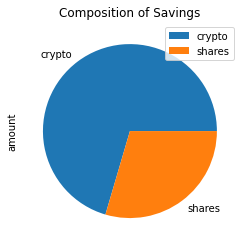

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Savings",)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
goal_value = emergency_fund - total_savings

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")

elif total_savings == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal.")

else:
    print(f"You are {goal_value} dollars away from reaching your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-21', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
agg_data = api.get_bars('AGG', tradeapi.TimeFrame.Day, "2017-03-21", "2022-03-21",limit=1000, adjustment='raw').df
spy_data = api.get_bars('SPY', tradeapi.TimeFrame.Day, "2017-03-21", "2022-03-21", limit=1000, adjustment='raw').df
df_stock_data = pd.concat([agg_data,spy_data], keys = ['AGG','SPY'], axis = 1, join = 'inner')

# Display sample data
df_stock_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-03-21 04:00:00+00:00       12024  108.175725  237.49  237.61  233.58   
2017-03-22 04:00:00+00:00       11111  108.455049  233.78  234.61  233.05   
2017-03-23 04:00:00+00:00       10901  108.417635  234.01  235.34  233.60   
2017-03-24 04:00:00+00:00       11229  108.398485  234.35  235.04  232.96   
2017-03-27 04:00:00+00:00       11112  108.600681  231.97  233.92  231.61   

                                                                       
                             close     volume trade_count        vwap  
timestamp                                                              
2017-03-21 04:00:00+00:00  233.760  131809275      443599  234.853857  
2017-03-22 04:00:00+00:00  234.250   97569204      307469  233.932509  
2017-03-23 04:00:00+00:00  233.940  100410277      333903  234.388790  
2017-03-24 04:00:00+00:00  233.880  112504853      359600  234.080978  
2017-03-27 04:00:00+00:00  233.575   87454452      289784  233.041576

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Daily = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30)

In [17]:
# Printing the simulation input data
MC_Daily.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-03-21 04:00:00+00:00       12024  108.175725          NaN  237.49   
2017-03-22 04:00:00+00:00       11111  108.455049     0.001385  233.78   
2017-03-23 04:00:00+00:00       10901  108.417635     0.000277  234.01   
2017-03-24 04:00:00+00:00       11229  108.398485    -0.000830  234.35   
2017-03-27 04:00:00+00:00       11112  108.600681     0.002399  231.97   

                                                                           \
                             high     low    close     volume trade_count   
timestamp                                                                   
2017-03-21 04:00:00+00:00  237.61  233.58  233.760  131809275      443599   
2017-03-22 04:00:00+00:00  234.61  233.05  234.250   97569204      307469   
2017-03-23 04:00:00+00:00  235.34  233.60  233.940  100410277      333903   
2017-03-24 04:00:00+00:00  235.04  232.96  233.880  112504853      359600   
2017-03-27 04:00:00+00:00  233.92  231.61  233.575   87454452      289784   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-03-21 04:00:00+00:00  234.853857          NaN  
2017-03-22 04:00:00+00:00  233.932509     0.002096  
2017-03-23 04:00:00+00:00  234.388790    -0.001323  
2017-03-24 04:00:00+00:00  234.080978    -0.000256  
2017-03-27 04:00:00+00:00  233.041576    -0.001304

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Daily.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/niccolomerlatti/Desktop/Alpaca API /Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008903,0.999882,1.002466,0.993183,0.997069,1.006940,1.009426,0.988164,1.000722,1.000302,...,1.005694,1.000113,1.016889,1.006552,1.007315,1.008582,0.992746,0.997869,1.014629,1.013378
2,1.008170,1.011048,0.990252,1.008847,0.988752,1.006355,1.016764,0.987482,0.990071,1.000518,...,1.004784,1.001022,1.016201,1.003075,1.006805,1.008683,0.997307,1.000993,1.027126,1.013207
3,1.010090,1.016724,0.989004,1.023619,0.989953,1.013490,1.017738,0.981695,0.985330,1.004253,...,1.021071,0.992851,1.014221,1.007396,1.004569,1.017942,0.996323,0.998135,1.026043,1.002235
4,1.016745,1.006869,0.998533,1.009071,0.986240,1.013792,1.010122,0.993121,0.979931,1.012112,...,1.018987,0.996193,1.023221,1.005399,0.997193,1.011975,0.986079,1.003109,1.033994,1.002427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.803613,23.605031,36.896248,10.081827,12.885423,10.243645,21.875005,4.703840,12.802990,9.274408,...,5.162282,22.439538,24.439011,25.736796,17.943240,5.840977,24.271967,12.791350,10.733456,7.415533
7557,5.785034,23.717979,36.518287,10.199500,12.849796,10.176707,21.776369,4.663962,12.830386,9.345640,...,5.187708,21.995380,25.067891,25.990307,17.900643,5.800925,23.953606,12.875065,10.746681,7.550565
7558,5.799885,23.722043,37.234054,10.296865,12.811347,10.105580,21.918938,4.638973,12.756975,9.333758,...,5.204988,21.867762,25.119904,26.030101,17.619199,5.777620,24.035609,13.029244,10.698838,7.587742
7559,5.844681,23.675812,37.140480,10.370190,12.857619,10.116836,21.787949,4.615081,12.723866,9.360743,...,5.208118,21.610061,25.247491,26.229358,17.459569,5.845184,24.389722,13.017109,10.756122,7.672705


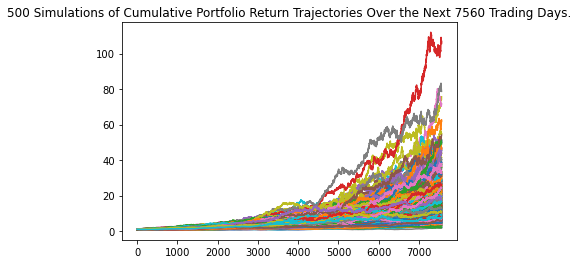

In [19]:
# Plot simulation outcomes
line_plot = MC_Daily.plot_simulation()

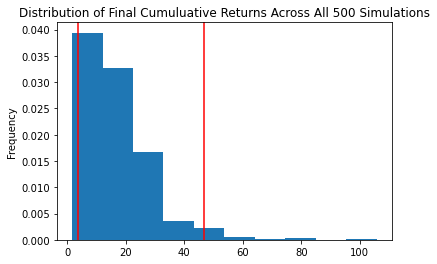

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Daily.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Daily.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             17.248928
std              11.819377
min               1.650523
25%               9.245709
50%              14.199012
75%              22.424829
max             105.690398
95% CI Lower      3.589638
95% CI Upper     46.598022
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $71792.76 and $931960.45


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $107689.13 and $1397940.67


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 1000

MC_Daily = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Daily.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-03-21 04:00:00+00:00       12024  108.175725          NaN  237.49   
2017-03-22 04:00:00+00:00       11111  108.455049     0.001385  233.78   
2017-03-23 04:00:00+00:00       10901  108.417635     0.000277  234.01   
2017-03-24 04:00:00+00:00       11229  108.398485    -0.000830  234.35   
2017-03-27 04:00:00+00:00       11112  108.600681     0.002399  231.97   

                                                                           \
                             high     low    close     volume trade_count   
timestamp                                                                   
2017-03-21 04:00:00+00:00  237.61  233.58  233.760  131809275      443599   
2017-03-22 04:00:00+00:00  234.61  233.05  234.250   97569204      307469   
2017-03-23 04:00:00+00:00  235.34  233.60  233.940  100410277      333903   
2017-03-24 04:00:00+00:00  235.04  232.96  233.880  112504853      359600   
2017-03-27 04:00:00+00:00  233.92  231.61  233.575   87454452      289784   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-03-21 04:00:00+00:00  234.853857          NaN  
2017-03-22 04:00:00+00:00  233.932509     0.002096  
2017-03-23 04:00:00+00:00  234.388790    -0.001323  
2017-03-24 04:00:00+00:00  234.080978    -0.000256  
2017-03-27 04:00:00+00:00  233.041576    -0.001304

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/niccolomerlatti/Desktop/Alpaca API /Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

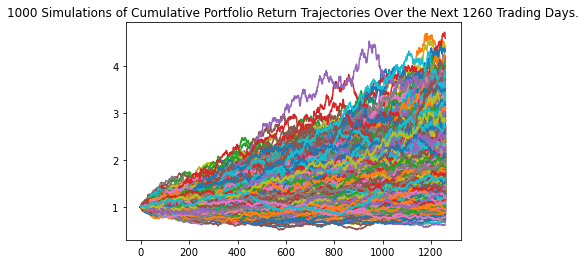

In [26]:
# Plot simulation outcomes
MC_Daily.calc_cumulative_return()
fiveyear_plot = MC_Daily.plot_simulation()

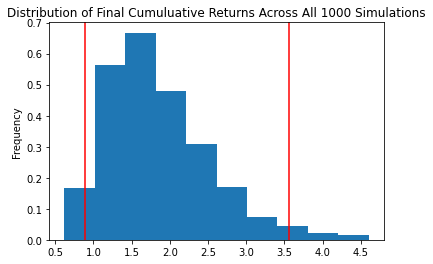

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Daily.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_tbl = MC_Daily.summarize_cumulative_return()

# Print summary statistics
print(sum_tbl)

count           1000.000000
mean               1.851261
std                0.674874
min                0.618355
25%                1.360088
50%                1.712475
75%                2.231005
max                4.603932
95% CI Lower       0.891967
95% CI Upper       3.560015
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum_tbl[8]*initial_investment,2)
ci_upper_five = round(sum_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53518.0 and $213600.92


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 1000

MC_Daily = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Daily.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-03-21 04:00:00+00:00       12024  108.175725          NaN  237.49   
2017-03-22 04:00:00+00:00       11111  108.455049     0.001385  233.78   
2017-03-23 04:00:00+00:00       10901  108.417635     0.000277  234.01   
2017-03-24 04:00:00+00:00       11229  108.398485    -0.000830  234.35   
2017-03-27 04:00:00+00:00       11112  108.600681     0.002399  231.97   

                                                                           \
                             high     low    close     volume trade_count   
timestamp                                                                   
2017-03-21 04:00:00+00:00  237.61  233.58  233.760  131809275      443599   
2017-03-22 04:00:00+00:00  234.61  233.05  234.250   97569204      307469   
2017-03-23 04:00:00+00:00  235.34  233.60  233.940  100410277      333903   
2017-03-24 04:00:00+00:00  235.04  232.96  233.880  112504853      359600   
2017-03-27 04:00:00+00:00  233.92  231.61  233.575   87454452      289784   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-03-21 04:00:00+00:00  234.853857          NaN  
2017-03-22 04:00:00+00:00  233.932509     0.002096  
2017-03-23 04:00:00+00:00  234.388790    -0.001323  
2017-03-24 04:00:00+00:00  234.080978    -0.000256  
2017-03-27 04:00:00+00:00  233.041576    -0.001304

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/niccolomerlatti/Desktop/Alpaca API /Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

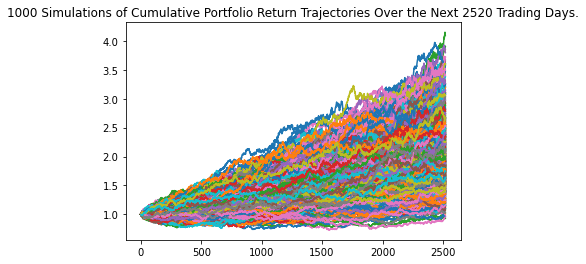

In [32]:
# Plot simulation outcomes
tenyear_line_plot =MC_Daily.plot_simulation()

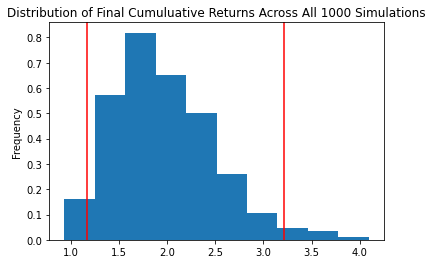

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Daily.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_tbl = MC_Daily.summarize_cumulative_return()

# Print summary statistics
print(sum_tbl)

count           1000.000000
mean               1.972445
std                0.526970
min                0.930059
25%                1.581298
50%                1.887465
75%                2.300883
max                4.094154
95% CI Lower       1.168182
95% CI Upper       3.211148
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sum_tbl[8]*initial_investment,2)
ci_upper_ten = round(sum_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70090.92 and $192668.89
